In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/LENOVO/Desktop/DataMining/KNNAlgorithmDataset.csv')

In [2]:
display(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
display(data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Drop the 'Unnamed: 32' column as it contains no useful data
clean_data = data.drop(columns=['Unnamed: 32'])

# Drop rows with any missing values
clean_data = clean_data.dropna()


# Display the cleaned data types to verify
display(clean_data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
display(clean_data.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## KNN

In [8]:
## KNN Algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Split the data into features and target
X = clean_data.drop(columns=['diagnosis'])
y = clean_data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 0.7894736842105263
Confusion Matrix:
[[66  5]
 [19 24]]


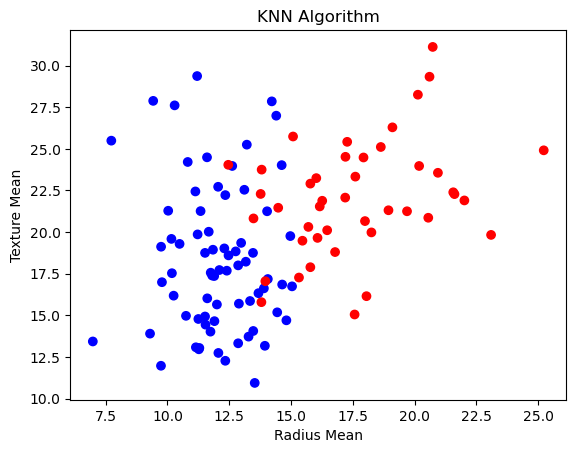

In [10]:
## KNN Algorithm Visualization
import matplotlib.pyplot as plt

x_axe = X_test['radius_mean']
y_axe = X_test['texture_mean']
z_axe = y_pred

mapping = {'M': 'red', 'B': 'blue'}
z_axe = y_test.map(mapping)


plt.scatter(x_axe, y_axe, c=z_axe)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('KNN Algorithm')
plt.show()



## Kmeans

In [12]:
#Data selection
kmeans_data = pd.DataFrame(data, columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

In [13]:
# Normalize the data
normalized_data = (kmeans_data - kmeans_data.mean() / (kmeans_data.std()))

In [14]:
#KMeans Algorithm
from sklearn.cluster import KMeans

# Create a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0,max_iter=1000,tol=0.0001)



In [15]:
# Fit the model to the data
kmeans.fit(normalized_data)

# Predict the labels of the data
labels = kmeans.predict(normalized_data)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7894736842105263
Confusion Matrix:
[[66  5]
 [19 24]]


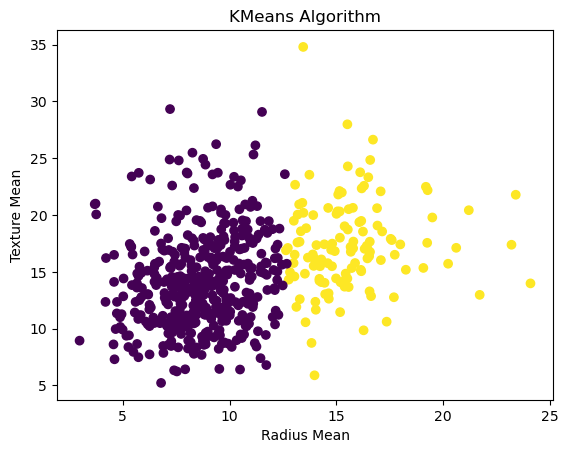

In [16]:
# Plot the data
plt.scatter(normalized_data['radius_mean'], normalized_data['texture_mean'], c=labels, cmap='viridis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('KMeans Algorithm')
plt.show()